In [1]:
from taylor_qnute import qnute as t_qnute
from helpers import *
from hamiltonians import Hamiltonian
from qnute_params import QNUTE_params
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import time

In [22]:
D=1
d=1
l=2

dt = 0.1
delta = 0.1
N = 100

psi0 = np.zeros(2**l, dtype=complex)
psi0[0] = 1.0

t = np.arange(0,N+1,1)*dt

num_experiments = 1000

fidelities = np.zeros( (num_experiments, N+1), dtype=float )

In [23]:
for expt in range(num_experiments):
    t0 = time.time()
    print('Starting experiment #{:03d}...'.format(expt+1))
    
    # Define Hamiltonian
    amps_2 = np.random.uniform(-1,1, 4**l) + 1j*np.random.uniform(-1,1, 4**l)
    amps_0 = np.random.uniform(-1,1, 4) + 1j*np.random.uniform(-1,1, 4)
    amps_1 = np.random.uniform(-1,1, 4) + 1j*np.random.uniform(-1,1, 4)
    hm_list = [
        [ np.arange(0,4**l,1), amps_2, [0,1] ],
        [[0,1,2,3], amps_0, [0]],
        [[0,1,2,3], amps_1, [1]]
    ]
    H = Hamiltonian(hm_list, d, l)

    # Set parameters
    params = QNUTE_params(H)
    params.load_hamiltonian_params(D, reduce_dim=False, load_measurements=False)
    params.set_run_params(dt, delta, N, 0, None, init_sv=psi0)

    # Run QNUTE
    times, svs, alist, slist, blist = t_qnute(params, logging=False, truncate=1, trotter_update=True)

    # Get exact results
    hmat = H.get_matrix()
    num_svs = np.zeros(svs.shape, dtype=complex)
    num_svs[0] = psi0
    for i in range(1,N+1):
        phi = exp_mat_psi(hmat*dt, num_svs[i-1])
        num_svs[i] = phi / np.linalg.norm(phi)

    # Calculate fidelity to exact results
    fid = np.zeros(N+1,dtype=float)
    for i in range(N+1):
        fid[i] = np.sqrt(np.abs( np.vdot(svs[i], num_svs[i]) ))
    fidelities[expt] = fid
    
    # Time logic
    t1 = time.time()
    duration = t1 - t0
    unit = 'secs'
    if duration > 60:
        duration /= 60
        unit = 'mins'
    print('Finished Experiment #{:03d}, Time = {:0.2f} {}'.format(expt+1,duration, unit))

Starting experiment #001...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #001, Time = 0.93 secs
Starting experiment #002...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #002, Time = 1.19 secs
Starting experiment #003...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #003, Time = 1.44 secs
Starting experiment #004...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #004, Time = 1.41 secs
Starting experiment #005...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #005, Time = 1.31 secs
Starting experiment #006...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #006, Time = 1.32 secs
Starting experiment #007...
Performing Hamiltonian precalculations...


	Calculating Unitary Domains... Done
Done
Finished Experiment #054, Time = 1.33 secs
Starting experiment #055...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #055, Time = 1.36 secs
Starting experiment #056...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #056, Time = 1.41 secs
Starting experiment #057...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #057, Time = 1.41 secs
Starting experiment #058...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #058, Time = 1.38 secs
Starting experiment #059...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #059, Time = 1.35 secs
Starting experiment #060...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #060, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #107, Time = 1.48 secs
Starting experiment #108...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #108, Time = 1.38 secs
Starting experiment #109...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #109, Time = 1.36 secs
Starting experiment #110...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #110, Time = 1.37 secs
Starting experiment #111...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #111, Time = 1.34 secs
Starting experiment #112...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #112, Time = 1.56 secs
Starting experiment #113...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #113, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #160, Time = 1.32 secs
Starting experiment #161...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #161, Time = 1.29 secs
Starting experiment #162...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #162, Time = 1.30 secs
Starting experiment #163...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #163, Time = 1.41 secs
Starting experiment #164...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #164, Time = 1.51 secs
Starting experiment #165...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #165, Time = 1.40 secs
Starting experiment #166...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #166, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #213, Time = 1.39 secs
Starting experiment #214...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #214, Time = 1.42 secs
Starting experiment #215...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #215, Time = 1.36 secs
Starting experiment #216...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #216, Time = 1.38 secs
Starting experiment #217...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #217, Time = 2.18 secs
Starting experiment #218...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #218, Time = 1.48 secs
Starting experiment #219...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #219, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #266, Time = 1.47 secs
Starting experiment #267...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #267, Time = 1.38 secs
Starting experiment #268...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #268, Time = 1.27 secs
Starting experiment #269...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #269, Time = 1.42 secs
Starting experiment #270...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #270, Time = 1.40 secs
Starting experiment #271...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #271, Time = 1.37 secs
Starting experiment #272...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #272, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #319, Time = 1.35 secs
Starting experiment #320...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #320, Time = 1.32 secs
Starting experiment #321...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #321, Time = 1.44 secs
Starting experiment #322...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #322, Time = 1.39 secs
Starting experiment #323...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #323, Time = 1.29 secs
Starting experiment #324...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #324, Time = 1.32 secs
Starting experiment #325...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #325, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #372, Time = 1.34 secs
Starting experiment #373...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #373, Time = 1.41 secs
Starting experiment #374...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #374, Time = 1.33 secs
Starting experiment #375...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #375, Time = 1.42 secs
Starting experiment #376...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #376, Time = 1.30 secs
Starting experiment #377...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #377, Time = 1.34 secs
Starting experiment #378...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #378, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #425, Time = 1.30 secs
Starting experiment #426...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #426, Time = 1.39 secs
Starting experiment #427...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #427, Time = 1.37 secs
Starting experiment #428...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #428, Time = 1.22 secs
Starting experiment #429...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #429, Time = 1.30 secs
Starting experiment #430...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #430, Time = 1.40 secs
Starting experiment #431...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #431, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #478, Time = 1.38 secs
Starting experiment #479...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #479, Time = 1.33 secs
Starting experiment #480...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #480, Time = 1.34 secs
Starting experiment #481...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #481, Time = 1.31 secs
Starting experiment #482...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #482, Time = 1.35 secs
Starting experiment #483...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #483, Time = 1.38 secs
Starting experiment #484...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #484, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #531, Time = 3.30 secs
Starting experiment #532...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #532, Time = 1.09 secs
Starting experiment #533...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #533, Time = 1.25 secs
Starting experiment #534...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #534, Time = 1.23 secs
Starting experiment #535...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #535, Time = 1.63 secs
Starting experiment #536...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #536, Time = 2.30 secs
Starting experiment #537...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #537, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #584, Time = 1.32 secs
Starting experiment #585...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #585, Time = 1.37 secs
Starting experiment #586...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #586, Time = 1.46 secs
Starting experiment #587...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #587, Time = 1.35 secs
Starting experiment #588...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #588, Time = 1.34 secs
Starting experiment #589...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #589, Time = 1.33 secs
Starting experiment #590...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #590, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #637, Time = 1.27 secs
Starting experiment #638...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #638, Time = 1.30 secs
Starting experiment #639...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #639, Time = 1.46 secs
Starting experiment #640...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #640, Time = 1.39 secs
Starting experiment #641...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #641, Time = 1.31 secs
Starting experiment #642...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #642, Time = 1.34 secs
Starting experiment #643...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #643, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #690, Time = 1.30 secs
Starting experiment #691...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #691, Time = 1.31 secs
Starting experiment #692...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #692, Time = 1.35 secs
Starting experiment #693...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #693, Time = 1.32 secs
Starting experiment #694...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #694, Time = 1.32 secs
Starting experiment #695...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #695, Time = 1.27 secs
Starting experiment #696...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #696, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #743, Time = 1.35 secs
Starting experiment #744...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #744, Time = 1.28 secs
Starting experiment #745...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #745, Time = 1.34 secs
Starting experiment #746...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #746, Time = 1.31 secs
Starting experiment #747...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #747, Time = 1.38 secs
Starting experiment #748...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #748, Time = 1.29 secs
Starting experiment #749...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #749, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #796, Time = 1.29 secs
Starting experiment #797...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #797, Time = 1.34 secs
Starting experiment #798...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #798, Time = 1.31 secs
Starting experiment #799...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #799, Time = 1.39 secs
Starting experiment #800...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #800, Time = 1.36 secs
Starting experiment #801...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #801, Time = 1.31 secs
Starting experiment #802...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #802, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #849, Time = 1.35 secs
Starting experiment #850...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #850, Time = 1.43 secs
Starting experiment #851...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #851, Time = 1.60 secs
Starting experiment #852...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #852, Time = 1.48 secs
Starting experiment #853...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #853, Time = 1.70 secs
Starting experiment #854...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #854, Time = 1.38 secs
Starting experiment #855...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #855, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #902, Time = 1.39 secs
Starting experiment #903...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #903, Time = 1.35 secs
Starting experiment #904...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #904, Time = 1.35 secs
Starting experiment #905...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #905, Time = 1.39 secs
Starting experiment #906...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #906, Time = 1.36 secs
Starting experiment #907...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #907, Time = 1.44 secs
Starting experiment #908...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #908, Ti

	Calculating Unitary Domains... Done
Done
Finished Experiment #955, Time = 1.34 secs
Starting experiment #956...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #956, Time = 1.45 secs
Starting experiment #957...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #957, Time = 1.35 secs
Starting experiment #958...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #958, Time = 1.43 secs
Starting experiment #959...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #959, Time = 1.38 secs
Starting experiment #960...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #960, Time = 1.33 secs
Starting experiment #961...
Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
Finished Experiment #961, Ti

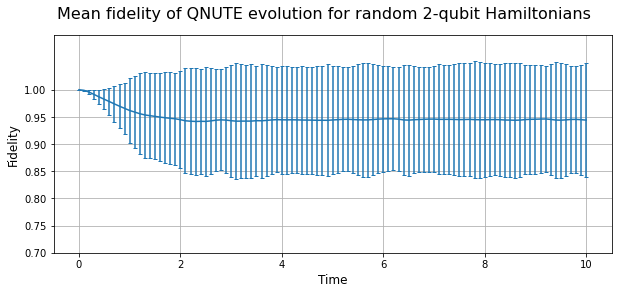

In [51]:
mean_f = np.mean(fidelities, axis=0)
std_f  = np.std(fidelities, axis=0)

# Plot the fidelities
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('Mean fidelity of QNUTE evolution for random 2-qubit Hamiltonians', fontsize=16)
ax.errorbar(t, mean_f, yerr=std_f, capsize=2)
ax.set_ylim(0.7,1.1)
ax.set_yticks(np.arange(0.7,1.01,0.05))
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Fidelity', fontsize=12)
ax.grid()

fig.set_facecolor('white')
# fig.tight_layout()

plt.show()


In [40]:
# std_f[-1]
mean_f[-1]

0.9440957699868846

Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
Done
start
end


C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


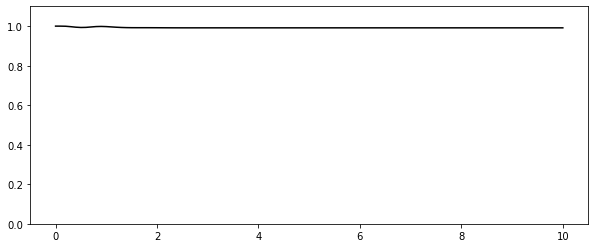

In [151]:
# Plot single fidelity
f,a = plt.subplots(figsize=(10,4))
a.plot(t, fid, 'k-')
a.set_ylim(0,1.1)
plt.show()

In [150]:
H.print()

Term 1 acting on the qubit locations [0, 1]:
	(0.23 + 0.37i) I_0 I_1 +
	(-0.32 + 0.06i) X_0 I_1 +
	(-0.81 + 0.13i) Y_0 I_1 +
	(0.94 + 0.59i) Z_0 I_1 +
	(0.90 + 0.35i) I_0 X_1 +
	(0.90 + 0.14i) X_0 X_1 +
	(-0.13 + 0.98i) Y_0 X_1 +
	(0.44 + 0.42i) Z_0 X_1 +
	(0.62 + 0.28i) I_0 Y_1 +
	(0.32 + 0.55i) X_0 Y_1 +
	(0.84 + 0.63i) Y_0 Y_1 +
	(0.92 + 0.96i) Z_0 Y_1 +
	(0.45 + 0.90i) I_0 Z_1 +
	(0.28 + 0.75i) X_0 Z_1 +
	(-0.82 + 0.83i) Y_0 Z_1 +
	(-0.68 + 0.81i) Z_0 Z_1 
Term 2 acting on the qubit locations [0]:
	(-0.95 + 0.19i) I_0 +
	(0.09 + 0.15i) X_0 +
	(0.03 + 0.92i) Y_0 +
	(-0.78 + 0.94i) Z_0 
Term 3 acting on the qubit locations [1]:
	(-0.74 + 0.54i) I_1 +
	(-0.74 + 0.38i) X_1 +
	(-0.03 + 0.91i) Y_1 +
	(0.84 + 0.49i) Z_1 


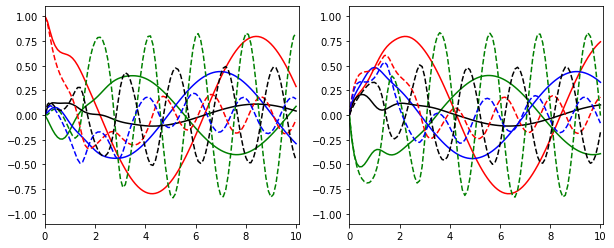

In [149]:
xl = (0,(N+1)*dt)
yl = (-1.1,1.1)

fig,axs = plt.subplots(1,2,figsize=(10,4))
plt.setp(axs, xlim=xl, ylim=yl)
axs[0].plot(t, np.real(svs[:,0]), 'r-')
axs[0].plot(t, np.real(svs[:,1]), 'g-')
axs[0].plot(t, np.real(svs[:,2]), 'b-')
axs[0].plot(t, np.real(svs[:,3]), 'k-')

axs[0].plot(t, np.real(num_svs[:,0]), 'r--')
axs[0].plot(t, np.real(num_svs[:,1]), 'g--')
axs[0].plot(t, np.real(num_svs[:,2]), 'b--')
axs[0].plot(t, np.real(num_svs[:,3]), 'k--')

axs[1].plot(t, np.imag(svs[:,0]), 'r-')
axs[1].plot(t, np.imag(svs[:,1]), 'g-')
axs[1].plot(t, np.imag(svs[:,2]), 'b-')
axs[1].plot(t, np.imag(svs[:,3]), 'k-')

axs[1].plot(t, np.imag(num_svs[:,0]), 'r--')
axs[1].plot(t, np.imag(num_svs[:,1]), 'g--')
axs[1].plot(t, np.imag(num_svs[:,2]), 'b--')
axs[1].plot(t, np.imag(num_svs[:,3]), 'k--')
plt.show()